In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#Scaling helps to standardize the range of features and ensure that each feature (continuous variable) contributes equally to the analysis.
from sklearn.linear_model import LogisticRegression
# Classification Report
from sklearn.metrics import classification_report
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
#Stat model to check P value
import statsmodels.api as sm


In [2]:
df = pd.read_csv("final.csv")
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction.Score,Point.Earned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,300
9455,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.80,0,0,5,771
9456,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,564
9457,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,339


In [3]:
df.isnull().sum()

CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction.Score    0
Point.Earned          0
dtype: int64

In [4]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction.Score,Point.Earned
count,9.459000e+03,9459.000000,9459.000000,9459.000000,9459.000000,9459.000000,9459.000000,9459.000000,9459.000000,9459.000000,9459.000000,9459.000000,9459.000000
mean,1.569088e+07,650.816577,37.375515,5.017338,76535.578620,1.531346,0.705043,0.500264,100168.070253,0.198330,0.198964,3.016069,606.069458
std,7.195061e+04,95.905390,8.317526,2.887859,62440.284809,0.579433,0.456048,0.500026,57503.098012,0.398763,0.399242,1.403239,226.187164
min,1.556570e+07,386.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,1.562821e+07,584.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51227.745000,0.000000,0.000000,2.000000,411.000000
50%,1.569111e+07,652.000000,37.000000,5.000000,97324.910000,1.000000,1.000000,1.000000,100335.600000,0.000000,0.000000,3.000000,603.000000
75%,1.575313e+07,717.000000,42.000000,7.500000,127652.410000,2.000000,1.000000,1.000000,149401.950000,0.000000,0.000000,4.000000,801.000000
max,1.581569e+07,850.000000,59.000000,10.000000,250898.100000,4.000000,1.000000,1.000000,199992.500000,1.000000,1.000000,5.000000,1000.000000


In [5]:
# ML algorithms doesnt understand string values so we need to convert it in to numerical value.
df['Geography'] = df['Geography'].astype('category')
df['Geography'] = df['Geography'].cat.codes
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction.Score,Point.Earned
0,15634602,Hargrave,619,0,Female,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,15647311,Hill,608,2,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,15619304,Onio,502,0,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,15701354,Boni,699,0,Female,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,15737888,Mitchell,850,2,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,15606229,Obijiaku,771,0,Male,39,5,0.00,2,1,0,96270.64,0,0,1,300
9455,15569892,Johnstone,516,0,Male,35,10,57369.61,1,1,1,101699.80,0,0,5,771
9456,15584532,Liu,709,0,Female,36,7,0.00,1,0,1,42085.58,1,1,3,564
9457,15682355,Sabbatini,772,1,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,339


In [6]:
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction.Score,Point.Earned
0,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0,0,1,300
9455,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.80,0,0,5,771
9456,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1,1,3,564
9457,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1,1,2,339


In [7]:
df = df.drop(columns = 'CustomerId')

In [8]:
df = df.drop(columns = 'Surname')
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction.Score,Point.Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,771,0,1,39,5,0.00,2,1,0,96270.64,0,0,1,300
9455,516,0,1,35,10,57369.61,1,1,1,101699.80,0,0,5,771
9456,709,0,0,36,7,0.00,1,0,1,42085.58,1,1,3,564
9457,772,1,1,42,3,75075.31,2,1,0,92888.52,1,1,2,339


In [9]:
# Getting my independant variables
X = df.drop(columns = 'Exited')
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction.Score,Point.Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,2,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,1,3,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,3,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,5,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,5,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,771,0,1,39,5,0.00,2,1,0,96270.64,0,1,300
9455,516,0,1,35,10,57369.61,1,1,1,101699.80,0,5,771
9456,709,0,0,36,7,0.00,1,0,1,42085.58,1,3,564
9457,772,1,1,42,3,75075.31,2,1,0,92888.52,1,2,339


In [10]:
# Deffining my numerical variable
Y = df['Exited']

In [11]:
# We need to split the dataset to two ( train and test)
# test_size=0.3 means 30% for testing and 70% for training
# random_state can be any integer value = we can regenerate the same test and train split if we need.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, random_state =21)

In [12]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction.Score,Point.Earned
7638,619,1,1,29,4,98955.87,1,0,1,131712.50,0,2,337
6208,577,0,0,32,1,0.00,2,1,0,9902.39,0,2,899
7122,644,0,1,40,8,93183.19,1,1,0,73882.49,0,3,617
780,642,2,1,34,8,0.00,1,1,0,72085.10,0,3,323
3354,554,1,0,43,2,120847.10,1,1,0,7611.61,1,3,646
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9336,724,1,0,33,9,119278.40,1,1,1,197148.20,0,2,306
48,585,1,1,36,5,146050.97,2,0,0,86424.57,0,3,665
8964,616,0,1,46,2,0.00,2,1,0,137136.50,0,2,646
5944,850,1,0,35,7,114285.20,1,0,1,129660.60,0,5,791


In [13]:
X_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction.Score,Point.Earned
1210,741,2,1,25,4,0.00,2,1,1,73873.65,0,5,234
5836,608,1,1,26,1,106649.00,1,0,1,7063.60,0,5,672
2437,705,0,0,50,4,77065.90,2,0,1,145159.30,0,4,726
3213,599,1,1,25,7,108380.70,1,1,1,79005.95,0,1,933
891,710,2,1,35,1,106518.52,1,1,1,127951.81,0,4,939
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,774,1,1,36,9,130809.80,1,1,0,152290.30,0,5,560
2945,476,1,1,30,3,134366.40,1,1,0,68343.53,0,4,709
4703,628,1,1,38,10,113525.80,1,1,0,46044.48,1,5,491
2292,654,1,1,37,2,145610.10,2,0,0,186300.60,0,5,458


In [14]:
scaler = MinMaxScaler()

In [15]:
X_train_scaled = scaler.fit_transform(X_train)

In [16]:
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled

array([[0.50215517, 0.5       , 1.        , ..., 0.        , 0.25      ,
        0.2078853 ],
       [0.41163793, 0.        , 0.        , ..., 0.        , 0.25      ,
        0.87933094],
       [0.55603448, 0.        , 1.        , ..., 0.        , 0.5       ,
        0.54241338],
       ...,
       [0.49568966, 0.        , 1.        , ..., 0.        , 0.25      ,
        0.57706093],
       [1.        , 0.5       , 0.        , ..., 0.        , 1.        ,
        0.75029869],
       [0.42672414, 0.        , 1.        , ..., 0.        , 0.5       ,
        0.77538829]])

In [18]:
X_test_scaled

array([[0.76508621, 1.        , 1.        , ..., 0.        , 1.        ,
        0.08482676],
       [0.47844828, 0.5       , 1.        , ..., 0.        , 1.        ,
        0.60812425],
       [0.6875    , 0.        , 0.        , ..., 0.        , 0.75      ,
        0.67264038],
       ...,
       [0.52155172, 0.5       , 1.        , ..., 1.        , 1.        ,
        0.39187575],
       [0.57758621, 0.5       , 1.        , ..., 0.        , 1.        ,
        0.35244922],
       [0.29741379, 1.        , 1.        , ..., 1.        , 0.75      ,
        0.49820789]])

In [19]:
log_reg = LogisticRegression(random_state = 0).fit(X_train_scaled,Y_train)

In [20]:
log_reg.predict(X_train_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
Y_pred = log_reg.predict(X_test_scaled)
Y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [22]:
log_reg.score(X_train_scaled,Y_train)

0.9986406887177164

In [23]:
log_reg.score(X_test_scaled,Y_test)

0.9982381959126145

In [35]:
report_classification = classification_report(Y_test, Y_pred)
print(report_classification)
print(confusion_matrix(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2271
           1       0.99      1.00      1.00       567

    accuracy                           1.00      2838
   macro avg       1.00      1.00      1.00      2838
weighted avg       1.00      1.00      1.00      2838

[[2267    4]
 [   1  566]]


In [25]:
# Compute confusion matrix
cmatrix = confusion_matrix(Y_test,Y_pred)

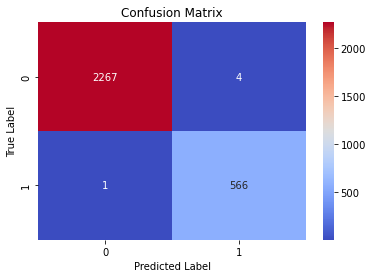

In [38]:
# Visualize the C.Matrix
sns.heatmap(cmatrix, annot=True, fmt="d" , cmap='coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [27]:
X_train_sm = sm.add_constant(X_train)
log_model = sm.Logit(Y_train,X_train_sm)
log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.007951
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 6621
Model:                          Logit   Df Residuals:                     6607
Method:                           MLE   Df Model:                           13
Date:                Thu, 07 Sep 2023   Pseudo R-squ.:                  0.9840
Time:                        11:14:39   Log-Likelihood:                -52.646
converged:                       True   LL-Null:                       -3292.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -10.8384      3.571     -3.035      0.002     -17.837      -3.840
Cred

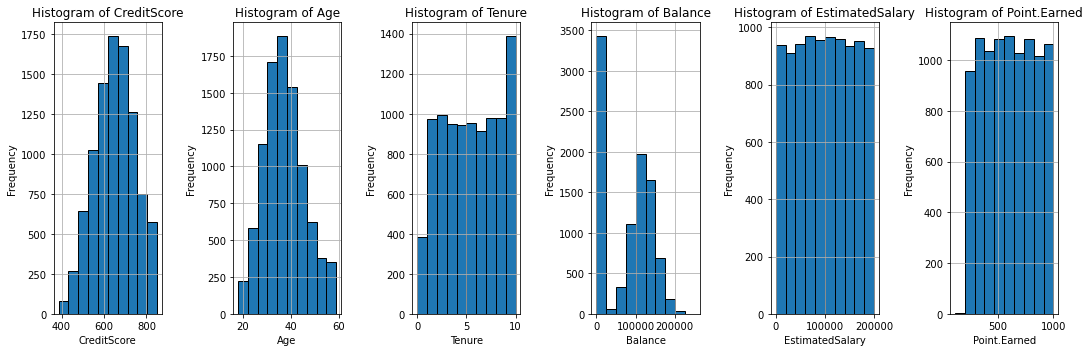

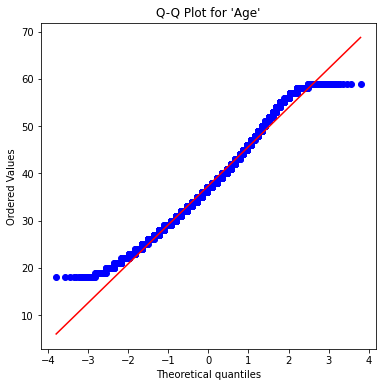

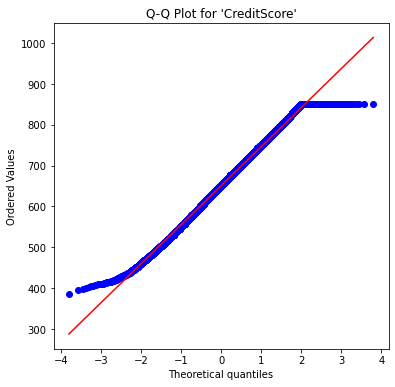

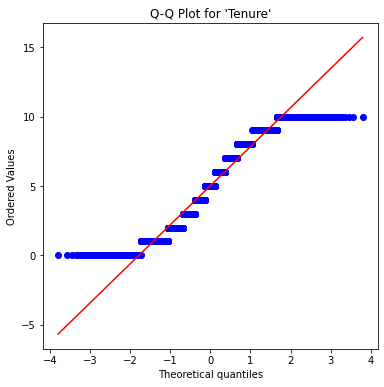

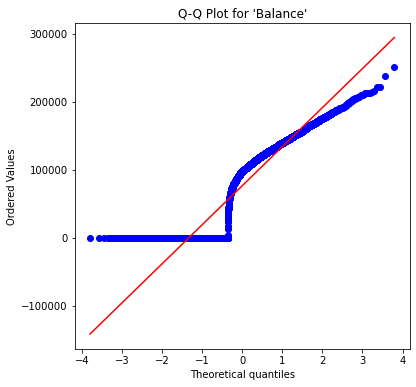

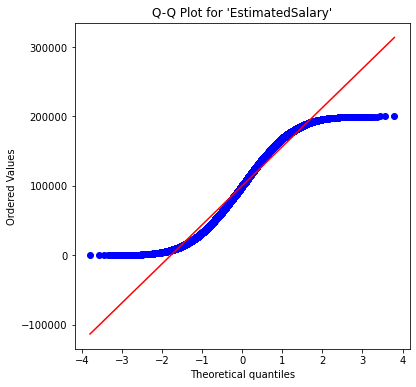

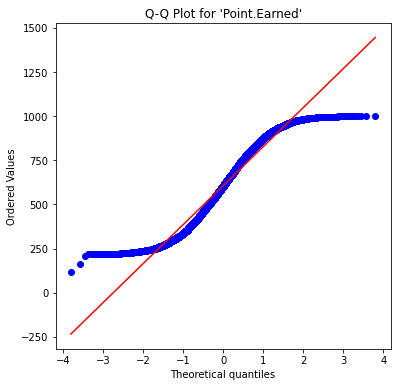

In [28]:
#graphically checking whether the data set is normally distributed or not
import matplotlib.pyplot as plt
import scipy.stats as stats

numerical_vars = ['CreditScore','Age','Tenure','Balance','EstimatedSalary','Point.Earned']

fig, axes = plt.subplots(nrows=1, ncols=len(numerical_vars), figsize=(15, 5))

for i, var in enumerate(numerical_vars):
    df[var].hist(ax=axes[i], bins=10, edgecolor='black', alpha=1)
    axes[i].set_title(f'Histogram of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
stats.probplot(df['Age'], dist="norm", plot=plt)
plt.title("Q-Q Plot for 'Age'")
plt.show()

plt.figure(figsize=(6, 6))
stats.probplot(df['CreditScore'], dist="norm", plot=plt)
plt.title("Q-Q Plot for 'CreditScore'")
plt.show()

plt.figure(figsize=(6, 6))
stats.probplot(df['Tenure'], dist="norm", plot=plt)
plt.title("Q-Q Plot for 'Tenure'")
plt.show()

plt.figure(figsize=(6, 6))
stats.probplot(df['Balance'], dist="norm", plot=plt)
plt.title("Q-Q Plot for 'Balance'")
plt.show()

plt.figure(figsize=(6, 6))
stats.probplot(df['EstimatedSalary'], dist="norm", plot=plt)
plt.title("Q-Q Plot for 'EstimatedSalary'")
plt.show()

plt.figure(figsize=(6, 6))
stats.probplot(df['Point.Earned'], dist="norm", plot=plt)
plt.title("Q-Q Plot for 'Point.Earned'")
plt.show()